한글폰트 설정

In [23]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,369 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test, y_test)=mnist.load_data()
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


모델 생성

In [5]:
ann=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')                        
])

In [6]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
r=ann.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3270 - accuracy: 0.7597 - val_loss: 0.5361 - val_accuracy: 0.8797
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5711 - accuracy: 0.8507 - val_loss: 0.4104 - val_accuracy: 0.9077
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4728 - accuracy: 0.8768 - val_loss: 0.3196 - val_accuracy: 0.9262
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4163 - accuracy: 0.8906 - val_loss: 0.3063 - val_accuracy: 0.9286
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3904 - accuracy: 0.8990 - val_loss: 0.2882 - val_accuracy: 0.9368
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3694 - accuracy: 0.9051 - val_loss: 0.2803 - val_accuracy: 0.9356
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.9095 - val_loss: 0.2792 - val_accuracy:

In [8]:
ann.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.3664 - accuracy: 0.9472


[0.36642301082611084, 0.9472000002861023]

정규화되지 않은 confusion matrix
[[ 933    1    3    1    0    3    6    1   32    0]
 [   0 1113    1    3    0    3    1    0   14    0]
 [   1    3  988    8    1    1    3    5   22    0]
 [   1    0   11  973    0    2    0    3   18    2]
 [   0    0    2    0  939    0   12    1   12   16]
 [   2    0    1   45    3  792    8    1   34    6]
 [   5    3    1    1    2    5  922    0   18    1]
 [   1    3   17   10    3    2    1  973    6   12]
 [   3    1    8    8    7    6   11    1  927    2]
 [   1    4    0   14   32    3    1    3   39  912]]


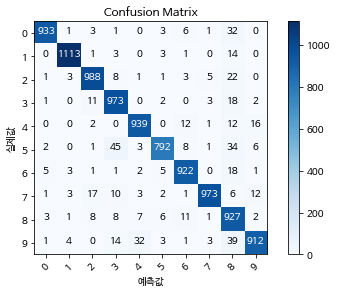

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("정규화된 confusion matrix")
  else:
    print("정규화되지 않은 confusion matrix")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel("실제값")
  plt.xlabel("예측값")
  plt.show()

p_test=ann.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_cm(cm,list(range(10)))

맞는 경우

Text(0.5, 1.0, '실제 숫자: 9 예측숫자: 9')

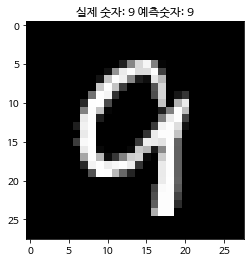

In [10]:
classified_idx=np.where(p_test==y_test)[0]
i=np.random.choice(classified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("실제 숫자: %s 예측숫자: %s" %(y_test[i],p_test[i]))

틀린 경우

Text(0.5, 1.0, '실제 숫자: 8 예측숫자: 3')

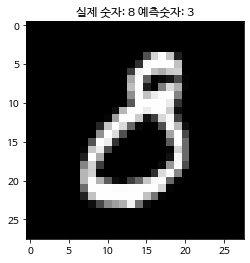

In [11]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("실제 숫자: %s 예측숫자: %s" %(y_test[i],p_test[i]))